# PS 88 Lab 4: A Warm Fuzzy Theory of Cooperation, with Real Data

This is the first lab where we will develop some theoretical ideas *and* see how they play out in some data; in this case, the survey that we had you fill out.

As always, let's first import some libraries we will use in the lab

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datascience import Table
%matplotlib inline

## Part 1: Theory

One reason that people may not always defect in a prisoners' dilemma situation (whether in the lab or real life) is that they might put weight on considerations beyond just material payoffs.

Here is a simple way to get at this notion. Suppose that our players play a game with the same *material* payoffs as the prisoners' dilemma from lecture:

*Material Payoffs*

|          | Cooperate | Defect     | 
|----------|----------|--------------|
| Cooperate |  2,2       |  0,3           |  
| Defect |  3,0       |  1,1           |  

Let the players' utility be equal to these material payoffs, except they get an additional $w > 0$ if they both pick cooperate. (Think of this as a "warm fuzzy" feeling for getting the best collective outcome.

**Question 1.1. Write a table which represents this version of the prisoners' dilemma. (Hint: you can double click on this cell and to copy the markdown code for the table above and paste it as a starting point.)**

*Answer to 1.1 here*

**Question 1.2. If $w=1/2$, what are the Nash Equilibria to this game?**

*Answer to 1.2 here*

**Question 1.3 . If $w=3/2$, what are the Nash Equilibria to this game**?

*Answer to 1.3 here*

If one player is uncertain about what strategy the other will use, then we can use the concept of Expected Utility to figure out the best response. For example, the plot below gives the expectued utility to cooperating and defecting as a function of the probability that the other player cooperates.

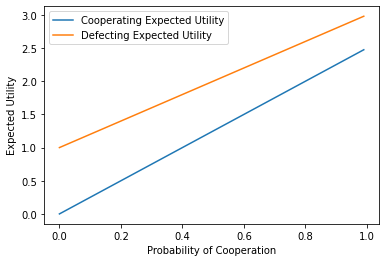

In [3]:
w = 1/2
p = np.arange(0,1, step=.01)
euc = p*(2 + w) + (1-p)*0
eud = p*3 + (1-p)*1
plt.ticklabel_format(style='plain')
plt.plot(p,euc, label='Cooperating Expected Utility')
plt.plot(p,eud, label='Defecting Expected Utility')
plt.xlabel('Probability of Cooperation')
plt.ylabel('Expected Utility')
plt.legend()

Note that the EU for defecting (gold) is always above the EU for cooperating (blue). So, for any probability of the other cooperating, it is always better to defect. This should line up with what you found in question 1.1.

**Question 1.4 Create a similar plot for $w=3/2$**

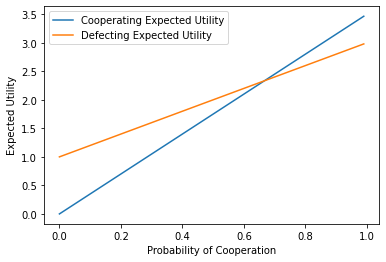

In [4]:
# Code for 1.4
w = 3/2
p = np.arange(0,1, step=.01)
euc = p*(2 + w) + (1-p)*0
eud = p*3 + (1-p)*1
plt.ticklabel_format(style='plain')
plt.plot(p,euc, label='Cooperating Expected Utility')
plt.plot(p,eud, label='Defecting Expected Utility')
plt.xlabel('Probability of Cooperation')
plt.ylabel('Expected Utility')
plt.legend()

**Question 1.6. Using the last two graphs, explain why the NE to this game are different when $w=1/2$ and $w=3/2$.**

*Answer to 1.6*

**Question 1.7. Now make the same graph where w=3. Compared to the $w=3/2$ case, how does this change the range of $p$ where Cooperating maximizing the player's EU?**

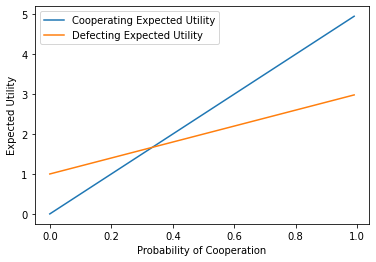

In [5]:
w = 3
p = np.arange(0,1, step=.01)
euc = p*(2 + w) + (1-p)*0
eud = p*3 + (1-p)*1
plt.ticklabel_format(style='plain')
plt.plot(p,euc, label='Cooperating Expected Utility')
plt.plot(p,eud, label='Defecting Expected Utility')
plt.xlabel('Probability of Cooperation')
plt.ylabel('Expected Utility')
plt.legend()

*Answer to 1.7*

**Question 1.8. Given the analysis above, suppose this is a reasonable model of how people make decisions in hypothetical prisoners' dilemmas, but individuals vary in both their "warm fuzzy" level $w$ and their optimism about their partner cooperating $p$. Will they be more or less likely to cooperate when $w$ is high? When $p$ is high?**

*Answer to 1.8*

## Part 2: An Empirical Test of the Warm Fuzzy Theory

Now let's explore how you all played this game in the survey. First we can load up the data with the `read_table` function

In [7]:
classdata = Table.read_table("PS88GTSurvey.csv")
classdata

Respondent,PD_US,PD_Class,PD_prC_US,PD_prC_Class,Proposer,Responder,GT,LibCon,LibConGuess,WarmFuzzy
1,Defect,Defect,0.3,0.8,2,2,2,6,7,8
2,Cooperate,Cooperate,0.75,0.9,5,4,1,6,5,10
3,Cooperate,Cooperate,0.7,0.85,5,3,1,7,6,8
4,Defect,Defect,0.25,0.33,3,2,1,6,5,9
5,Cooperate,Cooperate,0.45,0.3,4,4,3,6,5,7
6,Defect,Defect,40,60,nan,1,4,4,7,7
7,Defect,Cooperate,0.2,0.5,5,4,4,6,6,9
8,Cooperate,Cooperate,0,1,6,4,2,5,5,7
9,Defect,Defect,0.2,0.1,1,1,2,5,6,10
10,Defect,Cooperate,0.33,0.75,5,1,1,3,6,10


Let's say we want to see how often you said you would cooperate in when matched with a random adult in the United States. (Note: there are nicer ways to do this, but let's stick with things that have already been covered in our class and Data 8.)

The following line of code asks whether each of these answers is "Cooperate". The answer to this question is in the `PD_US` column.

In [12]:
classdata.column("PD_US") == "Cooperate"

array([False,  True,  True, False,  True, False, False,  True, False,
       False, False])

We can think of this as the Yes/No answer to whether each person cooperated. We can then count how many said they would cooperate by summing these up, since Python treats 'True' as a 1 and 'False' as a 0.

In [13]:
sum(classdata.column("PD_US") == "Cooperate")

4

We might be more interested in the proportion of cooperators. To get this we want to divide by the number of respondents, which we can do with the `num_rows` function applied to the table.

In [14]:
classdata.num_rows

11

In [15]:
sum(classdata.column("PD_US") == "Cooperate")/classdata.num_rows

0.36363636363636365

It might be interesting to contrast this with how you al said you would behave with a randomly picked class member, which is storted in the `PD_Class` column.

**Question 2.1. Write a line of code to compute the proportion of respondents who said they would cooperate when matched with a random member of the class.**

In [16]:
sum(classdata.column("PD_Class") == "Cooperate")/classdata.num_rows

0.5454545454545454

**Question 2.2. Is this more or less than the level of cooperation with a random adult in the United States? Does this result speak to any of the theories of when people cooperate that we discussed in class?**

*Answer to 2.2*

Now let's take a look at how you all expect others to behave. The `PD_prC_US` column has your answers to the question about the probability that a random US adult would cooperate. A first cut is to take the average of that.

In [18]:
np.mean(classdata.column("PD_prC_US"))

3.9709090909090916

Hmm that's weird: probabilities should be between 0 and 1! However, I didn't force this in the survey, I just asked you to put a number between 0 and 1. If you go back to the table you can see that someone didn't follow this instruction. But this is actually a nice teachable moment: we frequently need to "clean" our data before we can analyze it. In this case let's assume anyone who put an answer above 1 entered their answer as a percent. So, we want to take any answer above 1 and divide it by 100.

There are a few ways to do this, here is one that only uses some basic comments. First, we want to identify who answered above 1:

In [19]:
classdata.column("PD_prC_Class") > 1

array([False, False, False, False, False,  True, False, False, False,
       False, False])

What we want to do is take the original answer for any row where this is 'False", and divide by 100 for any row where it is true. The following line of code does this by adding together two terms:
- `(classdata.column("PD_prC_US") <= 1)*classdata.column("PD_prC_US")`: the first part will be equal to 1 if the original variable is less than or equal to 1 and equal to 0 otherwise. So if the original variable is less than 1, this will return the original variable, and if not we get 0.
- `(classdata.column("PD_prC_US") > 1)*classdata.column("PD_prC_US")/100`: by a similar logic, if the original variable is 1 this returns the original variable divided by 100, and if it is less than 1 it returns 0.

Combining, one of these is equal to 0, and the other is equal to what we want, and so by adding them we get what we want. 

In [20]:
prC_US_cleaned = (classdata.column("PD_prC_US") <= 1)*classdata.column("PD_prC_US") + (classdata.column("PD_prC_US") > 1)*classdata.column("PD_prC_US")/100
prC_US_cleaned

array([0.3 , 0.75, 0.7 , 0.25, 0.45, 0.4 , 0.2 , 0.  , 0.2 , 0.33, 0.5 ])

Now we can compute the average after this cleaning.

In [21]:
np.mean(prC_US_cleaned)

0.3709090909090909

**Question 2.3. Compare this to the real probability of cooperation with a random US adult. What does this say about the correctness of your expectations, on average?**

*Answer to 2.3*

**Question 2.4. Write code to clean the variable for the expected probability of cooperation with a random member of the class, and compare this to the real probability of cooperation.**

In [22]:
# Code for 2.4
prC_Class_cleaned = (classdata.column("PD_prC_Class") <= 1)*classdata.column("PD_prC_Class") + (classdata.column("PD_prC_Class") > 1)*classdata.column("PD_prC_Class")/100
np.mean(prC_Class_cleaned)

0.6209090909090909

*Words for 2.4*

We may also want to add the cleaned variable to our Table.

In [23]:
classdata = classdata.with_column("prC_US_cleaned", prC_US_cleaned)
classdata = classdata.with_column("prC_Class_cleaned", prC_Class_cleaned)
classdata

Respondent,PD_US,PD_Class,PD_prC_US,PD_prC_Class,Proposer,Responder,GT,LibCon,LibConGuess,WarmFuzzy,prC_US_cleaned,prC_Class_cleaned
1,Defect,Defect,0.3,0.8,2,2,2,6,7,8,0.3,0.8
2,Cooperate,Cooperate,0.75,0.9,5,4,1,6,5,10,0.75,0.9
3,Cooperate,Cooperate,0.7,0.85,5,3,1,7,6,8,0.7,0.85
4,Defect,Defect,0.25,0.33,3,2,1,6,5,9,0.25,0.33
5,Cooperate,Cooperate,0.45,0.3,4,4,3,6,5,7,0.45,0.3
6,Defect,Defect,40,60,nan,1,4,4,7,7,0.4,0.6
7,Defect,Cooperate,0.2,0.5,5,4,4,6,6,9,0.2,0.5
8,Cooperate,Cooperate,0,1,6,4,2,5,5,7,0,1
9,Defect,Defect,0.2,0.1,1,1,2,5,6,10,0.2,0.1
10,Defect,Cooperate,0.33,0.75,5,1,1,3,6,10,0.33,0.75


Now let's start to look at the relationship between the cooperation choice and the expectation that one's partner will cooperate. There are many ways to do this, but a simple one is to compare the average expectation about cooperation among those who cooperated vs defected.

We can do this by first using the `where` function to selection people who cooperated, and then take the average of their expectation about the probability of the partner cooperating. Let's first do this for the question about a random US adult.

In [24]:
np.mean(classdata.where("PD_US", "Cooperate").column("prC_US_cleaned"))

0.475

In [25]:
np.mean(classdata.where("PD_US", "Defect").column("prC_US_cleaned"))

0.31142857142857144

We can also compare the histograms of the two groups using the `hist` function and using a `group="PD_US"` option.

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


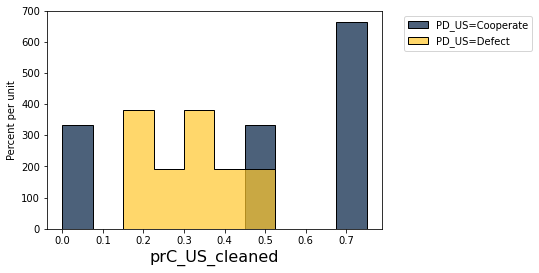

In [26]:
classdata.hist("prC_US_cleaned", group="PD_US")

**Question 2.5. Are people who choose to cooperate more or less pessimistic about their partner cooperating than those who choose to defect? How does this compare to what the "warm fuzzy" theory of cooperation predicted? (Note: even if you know how to do it, there is no need to do any formal hypothesis testing here, just compare the averages)**

*Answer to 2.5*

**Question 2.6. Write code to compare the expected probability of cooperation with a random class member for those who chose to cooperate in this scenario vs those who chose to defect. How does this compare to the "warm fuzzy" theory prediction?**

In [30]:
# Code for 2.6
np.mean(classdata.where("PD_Class", "Cooperate").column("prC_Class_cleaned"))

0.7166666666666667

In [31]:
np.mean(classdata.where("PD_Class", "Defect").column("prC_Class_cleaned"))

0.506

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


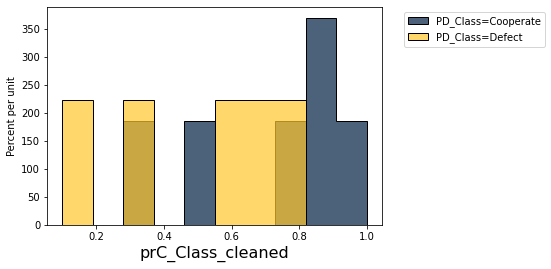

In [32]:
classdata.hist("prC_Class_cleaned", group="PD_Class")

*Words for 2.6*

The `WarmFuzzy` column contains your answers to the question "On a scale from 0 to 10, how much do you agree with the following statement: "It makes me feel good when a group I am working with sets aside their differences to achieve a common goal"". We might think that this is a reasonable measure of the $w$ variable discussed in the theory section. 

**Question 2.7. Write some code to see if people who gave higher answers to this question are more likely to cooperate with members of the class. How does this compare to the predictions of the Warm Fuzzy Theory?**

In [33]:
# Code for 2.7
np.mean(classdata.where("PD_US", "Cooperate").column("WarmFuzzy"))

8.0

In [51]:
np.mean(classdata.where("PD_US", "Defect").column("WarmFuzzy"))

8.714285714285714

In [52]:
np.mean(classdata.where("PD_Class", "Cooperate").column("WarmFuzzy"))

8.5

In [53]:
np.mean(classdata.where("PD_Class", "Defect").column("WarmFuzzy"))

8.4

*Words for 2.7*

**Question 2.8. What do you think might be an important factor determining how people decide whether to cooperate or defect in PD like scenarios? What question(s) could you ask in a survey like this to try and test the importance of this factor?**

*Words for 2.8*

## Section 3. Ultimatums with classmates

Now lets look at how your behavior in the ultimatum game compares with the theoretical predictions. 

**Question 3.1. Make histograms of the offer one would make as a proposer (`Proposer`) or responder (`Responder`)** 

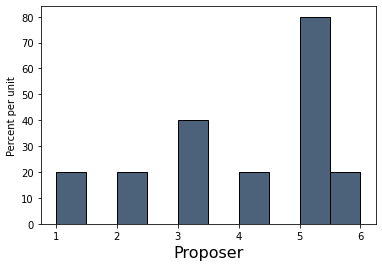

In [23]:
# Code for 3.1
classdata.hist("Proposer")

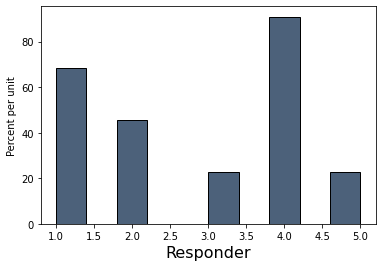

In [24]:
classdata.hist("Responder")

**Quetion 3.2 How does this compare to the theoretical predictions discussed in lecture?**

*Words for 3.2*

A related question we can ask is "Taking the responder behavior as fixed, do proposers make optimal offers?" To figure this out, we can write the expected utility for making offer $x$ as:
$$
EU(x) = Pr(x \text{ accepted}) (10-x) + Pr(x \text{ rejected})*0 = Pr(x \text{ accepted}) (10-x)
$$

Further, we have the information required to compute the probability that an offer is accepted. For each member of the class we know the minimal acceptable offer, which we can use to compute the proportion that would accept a given offer. Let's walk through one way to do this.

First, let's make an array with the possible offers:

In [34]:
offers = np.arange(0, 11)
offers

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

If we want to know how many people would accept an offer of, say, 3, we can ask how many set their minimal acceptable offer to 0,1,2, or 3. We can do that with the following code:

In [35]:
sum(classdata.column("Responder") <= 3)

6

And we can convert this into a probability by dividing by the number of respondents:

In [36]:
sum(classdata.column("Responder") <= 3)/classdata.num_rows

0.5454545454545454

**Question 3.3. Write code to compute the probability that an offer of 2 would be *rejected***

In [37]:
# Answer to 3.3
sum(classdata.column("Responder") > 2)/classdata.num_rows

0.5454545454545454

We would like to know the probability of all possible offers being accepted. We can create an array with these probabilities with a for loop:

In [38]:
paccept = []
for i in offers:
    paccept = np.append(paccept, sum(classdata.column("Responder")<= i)/classdata.num_rows)
paccept

array([0.        , 0.27272727, 0.45454545, 0.54545455, 0.90909091,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

Now let's combine the offer and probability of acceptance into a table.

In [39]:
offertable = Table().with_columns("Offer", offers, "PrAccept", paccept)
offertable

Offer,PrAccept
0,0
1,0.272727
2,0.454545
3,0.545455
4,0.909091
5,1
6,1
7,1
8,1
9,1


One interesting thing to lok at is the probability of acceptance as a function of the offer:

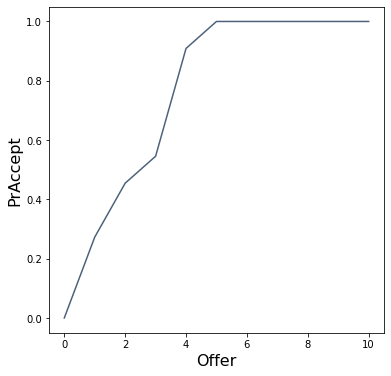

In [40]:
offertable.plot("Offer", "PrAccept")

**Question 3.4. Write code to compute the expected utility to making each offer, add this as a column to the `offertable`, and then plot the expected utility as a function of the offer**

In [41]:
offertable=offertable.with_column("EU", (10-offertable.column("Offer"))*offertable.column("PrAccept"))
offertable

Offer,PrAccept,EU
0,0,0
1,0.272727,2.45455
2,0.454545,3.63636
3,0.545455,3.81818
4,0.909091,5.45455
5,1,5
6,1,4
7,1,3
8,1,2
9,1,1


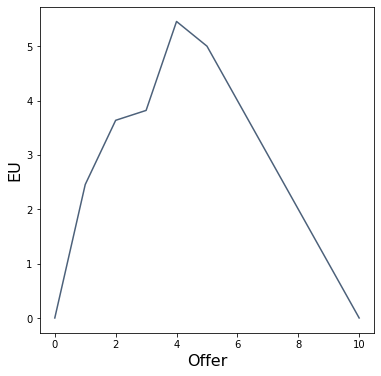

In [42]:
offertable.plot("Offer", "EU")

**Question 3.5. Compare this to the offers made. Did you all typically choose to make offers that give close to the maximum EU (assuming all you care about is money!)**

*Words for 3.5*

There are some other variables from the survey that we haven't looked at yet:
- `GT` is how much game theory one knew before starting the class
- `LibCon` is the 1-7 point scale of political views, where 1 is most conservative and 7 is most liberal.
- `LibConGuess` is the belief about the average `LibCon`. 

**Question 3.6. Come up with a quick theory (2-3 sentences) for why one of these variables might be related with the offers made and/or accepted in the ultimatum game. Then write some code to look at this relationship, and describe what you find.**

*Theory for 3.6*

In [35]:
# Code for 3.6

*What you found in 3.6*